# Integración numérica Montecarlo

**Referencia:**
- https://ocw.mit.edu/courses/mechanical-engineering/2-086-numerical-computation-for-mechanical-engineers-fall-2014/nutshells-guis/MIT2_086F14_Monte_Carlo.pdf
- http://ta.twi.tudelft.nl/mf/users/oosterle/oosterlee/lec8-hit-2009.pdf
- Sauer, Timothy. *Análisis Numérico*, 2da. Edición, ISBN: 978-607-32-2059-0.

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/f/f2/Integral_as_region_under_curve.svg" width="300px" height="100px" />



## Motivación

En análisis de ingeniería, normalmente debemos evaluar integrales definidas sobre un dominio complejo o en un espacio de dimensión alta.

> Por ejemplo, podríamos querer calcular:
> - la deflexión en una viga de geometría complicada, 
> - el volumen de una parte tridimensional de una aeronave,
> - o evaluar alguna medida de rendimiento (rentabilidad) en algún proceso que sea expresada como una integral de alguna función sin antiderivada primitiva (que se pueda expresar en términos de funciones elementales).

A la mano tenemos herramientas de integración analítica cuando tanto el espacio de integración como la función a integrar son simples. Cuando la función a integrar es difícil (incluso, imposible) de integrar podemos aún recurrir a métodos numéricos de integración. 

> Desafortunadamente, los métodos determinísiticos de integración fallan cuando:
> - la región es demasiado compleja para discretizarla,
> - o la función a integrar es demasiado irregular,
> - o la convergencia es demasiado lenta debido a la alta dimensionalidad del espacio de integración (ver [Maldición de la dimensionalidad](https://es.wikipedia.org/wiki/Maldici%C3%B3n_de_la_dimensi%C3%B3n)).

Por eso en esta clase veremos una *técnica alternativa de integración numérica*: **Integración Montecarlo**.

### Ejemplos de funciones sin antiderivada primitiva.

De su curso de cálculo integral seguro recordarán (o estarán viendo) que existen funciones cuya integral no tiene primitiva. Es decir, **que no podemos encontrar una función que se pueda expresar en forma de funciones elementales cuya derivada sea tal función**.

Esto **no significa que dicha función no se pueda integrar**, ya que sabemos que cualquier función continua es integrable (y la mayoría de funciones que vemos a ese nivel, lo son). Lo que ocurre es que no podemos expresar dicha integral de una forma sencilla (por ejemplo, en función de exponenciales, senos, cosenos, logaritmos...).

Algunas integrales que no son elementales son:
- $\int e^{p(x)}\text{d}x$, donde $p(x)$ es un polinomio de grado mayor o igual a dos.
- $\int \frac{1}{log(x)}\text{d}x$.
- $\int \frac{sin(x)}{x}\text{d}x$

**Referencia:**
- https://www.gaussianos.com/funciones-sin-primitiva-elemental/

### Ejemplos de regiones difíciles de discretizar.

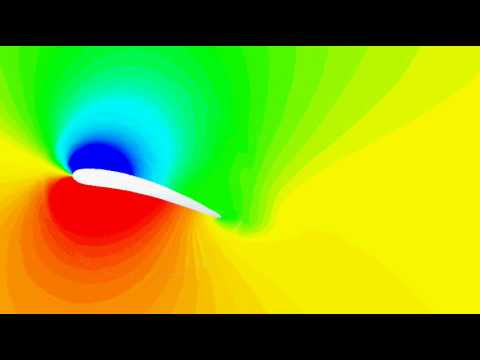

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Ti5zUD08w5s')

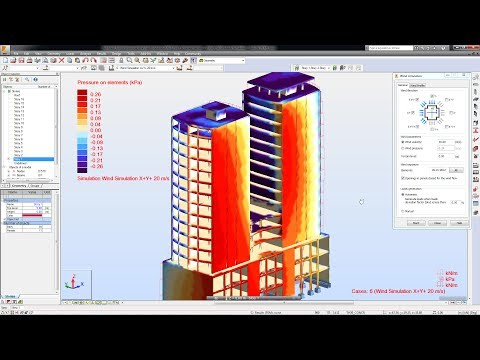

In [2]:
YouTubeVideo('jmsFC0mNayM')

___
## Integración Montecarlo tipo 1
Se basa en la definición de *valor promedio* de una función y en el *valor esperado* de una *variable aleatoria uniforme*.

Presentamos esto mediante un ejemplo.

**Ejemplo.** Aproxime el área bajo la curva $y=(x-2)^2$ en el intervalo $\left[0,1\right]$.

Veamos primero cómo luce dicha área.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def f(x):
    return (x-2)**2

In [16]:
N = 10**4                
u = np.random.rand(N)

In [12]:
# Evaluamos en 'f' los númeroa aleatorios para que se muestren sobre la curva
y = f(u)


Entonces, lo que queremos es aproximar el área de la región $\mathcal{D}$. Llamaremos esta área $A(\mathcal{D})$.

De cálculo integral, sabemos que

$$A(\mathcal{D})=\int_{0}^{1}y\text{d}x=\int_{0}^{1}(x-2)^2\text{d}x.$$

Por *definición*, el **valor promedio** de una función $f:\left[a,b\right]\to\mathbb{R}$ en un intervalo $\left[a,b\right]$ es

$$\frac{1}{b-a}\int_{a}^{b}f(x)\text{d}x.$$

Entonces, el área bajo la curva $y=(x-2)^2$ es exactamente el valor promedio de $f(x)=(x-2)^2$ en $\left[0,1\right]$. Este valor promedio puede aproximarse mediante el promedio de los valores de la función en puntos aleatorios **uniformemente distribuidos** en el intervalo $\left[0,1\right]$. Es decir,

$$A(\mathcal{D})=\int_{0}^{1}(x-2)^2\text{d}x=\int_{0}^{1}f(x)\text{d}x\approx \frac{1}{N}\sum_{i=1}^{N}f(u_i)=\frac{1}{N}\sum_{i=1}^{N}(u_i-2)^2$$,

donde $u_i$ son realizaciones de la variable aleatoria $U\sim\mathcal{U}\left[0,1\right]$ ($U$ distribuye uniformemente en el intervalo $\left[0,1\right]$).

In [13]:
# Se calcula el promedio de los puntos evaluados
np.mean(y)

2.333317132849142

In [14]:
# Error de integración 
1/np.sqrt(N)

0.0001

**¿Cómo construir vectores de números aleatorios?**
- Ver [numpy.random](https://docs.scipy.org/doc/numpy-1.10.0/reference/routines.random.html).

En este caso necesitamos $N$ números aleatorios uniformemente distribuidos...

In [24]:
N = 10**2
u = np.random.rand(N)

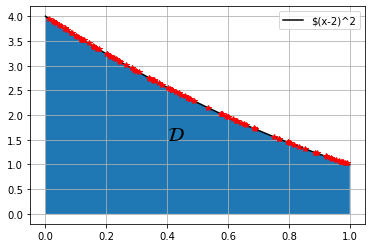

In [25]:
x = np.linspace(0,1,100)
y = f(x)
plt.plot(x,y,'k', label = '$(x-2)^2')
plt.fill_between(x,y) #Rellenar el espacio entre 'x' y 'y'
plt.text(0.4,1.5, '$\mathcal{D}$', fontsize = 20)
plt.plot(u,f(u),'r*')
plt.grid()
plt.legend()

En este caso, la integral se puede hacer fácilmente. Comparemos el resultado con el valor real:

$$A(\mathcal{D})=\int_{0}^{1}(x-2)^2\text{d}x=\left.\frac{(x-2)^3}{3}\right|_{x=0}^{x=1}=\frac{7}{3}$$

Hagamos una tabla viendo:
- cantidad de terminos
- valor de la aproximacion
- error relativo

In [40]:
# Definimos el primer método de integración Montecarlo
def Montecarlo1(f,N):
    u = np.random.rand(N) # 'N' Números aleatrorios uniformemente distribuidos entre 0 y 1
    y = f(u) #Evaluar los puntos 'u' en la función a integrar 
    return np.mean(y) #Aproximación de la integral

In [43]:
N = np.logspace(1,7,7).astype('int') #[10**1, 10**2, ..., 10**5]
N

array([      10,      100,     1000,    10000,   100000,  1000000,
       10000000])

In [44]:
for n in N:
    print(n)

10
100
1000
10000
100000
1000000
10000000


In [45]:
tabla = pd.DataFrame(index = N, columns = ['Integral'])
for n in N:
    tabla.loc[n] = Montecarlo1(f,n)
tabla['Error absoluto'] = np.abs(tabla['Integral']-7/3)
tabla['Error relativo'] = 1/np.sqrt(N)
tabla

,Integral,Error absoluto,Error relativo
10,2.340325,0.006991,0.316228
100,2.420067,0.086734,0.100000
1000,2.312011,0.021323,0.031623
10000,2.324873,0.008461,0.010000
100000,2.332445,0.000888,0.003162
1000000,2.332327,0.001006,0.001000
10000000,2.333231,0.000102,0.000316


Ver que los resultados son distintos cada vez (¿porqué?). Sin embargo, se aproximan más o menos en la misma medida.

**Aproximación de integrales en intervalos distintos a $\left[0,1\right]$.**

Sin embargo, no todas las integrales que hacemos son en el intervalo $\left[0,1\right]$. En general, podemos integrar cualquier función continua en el intervalo $\left[a,b\right]$, donde $a,b\in\mathbb{R}$ con $a<b$.

Sea $f:\left[a,b\right]\to\mathbb{R}$ una función continua en el intervalo $\left(a,b\right)$ (por lo tanto es integrable endicho intervalo). Queremos resolver:

$$\int_{a}^{b}f(x)\text{d}x.$$

¿Cómo podemos usar la idea del valor promedio para resolver esto?

El valor promedio de $f$ en $\left[a,b\right]$ es:

$$\frac{1}{b-a}\int_{a}^{b}f(x)\text{d}x.$$

Este valor promedio puede aproximarse mediante el promedio de $N$ valores de la función en puntos aleatorios **uniformemente distribuidos** en el intervalo $\left[a,b\right]$. Es decir,

$$\frac{1}{b-a}\int_{a}^{b}f(x)\text{d}x\approx \frac{1}{N}\sum_{i=1}^{N}f(u_i),$$

donde $u_i$ son realizaciones de la variable aleatoria $U\sim\mathcal{U}\left[a,b\right]$ ($U$ distribuye uniformemente en el intervalo $\left[a,b\right]$).

Finalmente, la aproximación montecarlo tipo 1 con $N$ términos es 

$$\int_{a}^{b}f(x)\text{d}x\approx \frac{b-a}{N}\sum_{i=1}^{N}f(u_i).$$

Escribamos una función que tenga como entradas:
- la función a integrar $f$,
- los límites de integración $a$ y $b$, y
- el número de términos que se usará en la aproximación $N$,

y que devuelva la aproximación montecarlo tipo 1 de la integral $\int_{a}^{b}f(x)\text{d}x$.

In [65]:
def Montecarlo(f,a,b,N):
    u = np.random.uniform(a,b,N)
    y = f(u)
    return np.mean(y)*(b-a)

In [66]:
# Encontrar la aproximácion de la integral de 'f' entre 1 y 2
Montecarlo(f,1,2,10**5)

0.3331778354729232

**Actividad.** Utilizar la anterior función para realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
- $\int_{2}^{2.1} e^{x^2}\text{d}x$.
- $\int_{2}^{2.1} \frac{1}{log(x)}\text{d}x$.
- $\int_{2}^{2.1} \frac{sin(x)}{x}\text{d}x$.

### Función 1

In [62]:
def f1(x):
    return np.exp(x**2)

In [63]:
def Montecarlo(f,a,b,N):
    u = np.random.uniform(a,b,N)
    y = f(u)
    return np.mean(y)*(b-a)

In [68]:
Montecarlo(f1,2,2.1,10**5)

6.736940485309209

In [70]:
tabla = pd.DataFrame(index = N, columns = ['Integral'])
for n in N:
    tabla.loc[n] = Montecarlo(f1,2,2.1,n)
tabla['Error absoluto'] = np.abs(tabla['Integral']-7/3)
tabla['Error relativo'] = 1/np.sqrt(N)
tabla

,Integral,Error absoluto,Error relativo
10,6.969213,4.63588,0.316228
100,6.725281,4.391948,0.100000
1000,6.736994,4.403661,0.031623
10000,6.723737,4.390404,0.010000
100000,6.74053,4.407196,0.003162
1000000,6.737371,4.404038,0.001000
10000000,6.738082,4.404749,0.000316


### Función 2

In [72]:
def f2(x):
    return 1/np.log(x)

In [74]:
Montecarlo(f2,2,2.1,10**5)

0.13938337428301562

In [76]:
tabla = pd.DataFrame(index = N, columns = ['Integral'])
for n in N:
    tabla.loc[n] = Montecarlo(f2,2,2.1,n)
tabla['Error absoluto'] = np.abs(tabla['Integral']-7/3)
tabla['Error relativo'] = 1/np.sqrt(N)
tabla

,Integral,Error absoluto,Error relativo
10,0.138753,2.194581,0.316228
100,0.139722,2.193611,0.100000
1000,0.139439,2.193894,0.031623
10000,0.139388,2.193946,0.010000
100000,0.139391,2.193942,0.003162
1000000,0.139377,2.193956,0.001000
10000000,0.139381,2.193952,0.000316


### Función 3

In [77]:
def f3(x):
    return np.sin(x)/x

In [79]:
Montecarlo(f3,2,2.1,10**5)

0.04328119884450852

In [81]:
tabla = pd.DataFrame(index = N, columns = ['Integral'])
for n in N:
    tabla.loc[n] = Montecarlo(f3,2,2.1,n)
tabla['Error absoluto'] = np.abs(tabla['Integral']-7/3)
tabla['Error relativo'] = 1/np.sqrt(N)
tabla

,Integral,Error absoluto,Error relativo
10,0.043456,2.289877,0.316228
100,0.04334,2.289993,0.100000
1000,0.043284,2.290049,0.031623
10000,0.043276,2.290057,0.010000
100000,0.043285,2.290049,0.003162
1000000,0.043285,2.290048,0.001000
10000000,0.043286,2.290048,0.000316


### Tabla de todas las integrales juntas

In [94]:
tabla = pd.DataFrame(index = N, columns = ['Función 1', 'Función 2', 'Función 3'])
for n in N:
    tabla.loc[n, 'Función 1'] = Montecarlo(f1,2,2.1,n)
    tabla.loc[n, 'Función 2'] = Montecarlo(f2,2,2.1,n)
    tabla.loc[n, 'Función 3'] = Montecarlo(f3,2,2.1,n)
tabla['Error relativo'] = 1/np.sqrt(N)
tabla

,Función 1,Función 2,Función 3,Error relativo
10,6.289874,0.13988,0.043488,0.316228
100,6.733735,0.138916,0.043256,0.100000
1000,6.712576,0.139298,0.043313,0.031623
10000,6.744193,0.139365,0.043278,0.010000
100000,6.739101,0.139388,0.043288,0.003162
1000000,6.736675,0.139382,0.043286,0.001000
10000000,6.737892,0.139379,0.043285,0.000316


___
## Integración Montecarlo tipo 2
Con la integración montecarlo tipo 1 pudimos aproximar integrales de funciones continuas de una variable en un intervalo dado. En realidad este mismo análisis se puede ampliar para aproximar integrales definidas de funciones continuas de varias variables (integrales sobre áreas, volúmenes e hipervolúmenes) dado que la noción de valor promedio de una función se extiende a cualquier dimensión.

**Este es en realidad el caso interesante, pues las integrales de funciones complicadas también se pueden aproximar por métodos numéricos clásicos, pero cuando la dimensión aumenta es cuando montecarlo se vuelve una herramienta relevante. Dado que no lo veremos en clase por la limitación de que la mayoría no han visto cálculo en varias variables, este tema puede ser elegido como proyecto de módulo, donde se exploraría también como mejorar la aproximación de integrales montecarlo.**

Como vimos en el ejemplo (y como debe ser claro de su curso de cálculo integral) una de las aplicaciones más importantes de la integración es hallar áreas. Y no solo el área bajo una curva, sino áreas entre curvas y áreas de regiones más complicadas.

Antes de ver la integración montecarlo tipo 2, ¿cómo podemos usar la integración montecarlo tipo 1 para aproximar el área entre curvas?

**Ejemplo.** Aproxime el área entre las curvas $y=x$, y $y=x^2$ en el intervalo $\left[0,1\right]$.

Veamos primero cómo luce dicha área.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return x**2
x = np.linspace(0,1,100)

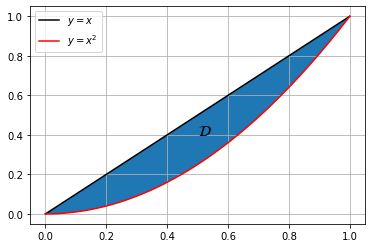

In [4]:
plt.plot(x,x,'k', label = '$y=x$')
plt.plot(x,f(x),'r',label = '$y = x^2$')
plt.legend()
plt.fill_between(x,x,f(x))
plt.text(0.5,0.4, '$\mathcal{D}$', fontsize = 15)
plt.grid()

De cálculo integral, sabemos que

$$A(\mathcal{D})=\int_{0}^{1}(x-x^2)\text{d}x.$$

Entonces...

In [5]:
def f2(x):
    return x-x**2
def montecarlo1(f,a,b,n):
    u = np.random.uniform(a,b,n)
    y = f(u)
    return (b-a)*np.mean(y)

In [7]:
N = 10**5
montecarlo1(f2,0,1,N)

0.16701170494124945

De modo que si la región se puede describir fácilmente, entonces podemos aproximar la integral sin problema.

Pero, ¿qué pasa si la geometría de la región no se puede describir fácilmente?

Como en el caso anterior, motivaremos el método con un caso conocido. Vamos a aproximar el valor de $\pi$ usando el área de un círculo unitario.

Dibujemos el círculo unitario en la región $\mathcal{R}=\left[-1,1\right]\times\left[-1,1\right]$.

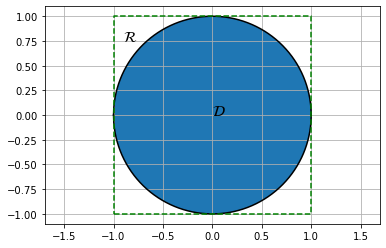

In [24]:
def CirculoA(x):
    return np.sqrt(1-x**2)
def CirculoB(x):
    return -np.sqrt(1-x**2)
x = np.linspace(-1,1,1500)
plt.plot(x,CirculoA(x),'k')
plt.plot(x,CirculoB(x),'k')
plt.axis('equal')
plt.fill_between(x,CirculoA(x),CirculoB(x))
plt.plot([-1,1,1,-1,-1],[-1,-1,1,1,-1], 'g--')
plt.text(0.0,0.0, '$\mathcal{D}$', fontsize = 15)
plt.text(-0.90,0.75, '$\mathcal{R}$', fontsize = 15)
plt.grid()

Si aproximamos $A(\mathcal{D})$ aproximamos el valor de $\pi$, pues el área del círculo unitario es:

$$A(\mathcal{D})=\pi(1)^2=\pi.$$

Por otra parte es claro que el área de la región $\mathcal{R}=\left[-1,1\right]\times\left[-1,1\right]$ es

$$A(\mathcal{R})=4.$$

Ahora, haremos uso de nuestro generador de números aleatorios. Supongamos que escogemos un punto aleatorio en la región $\mathcal{R}=\left[-1,1\right]\times\left[-1,1\right]$. Describimos este punto como $(X,Y)$ para $X$ e $Y$ variables aleatorias uniformes sobre el intervalo $\left[-1,1\right]$.

¿Cómo generamos puntos aleatorios en un rectángulo?

IndexError: index 10 is out of bounds for axis 0 with size 10

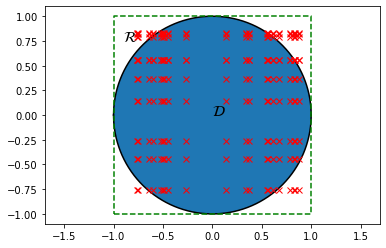

In [30]:
x = np.linspace(-1,1,1500)
plt.plot(x,CirculoA(x),'k')
plt.plot(x,CirculoB(x),'k')
plt.axis('equal')
plt.fill_between(x,CirculoA(x),CirculoB(x))
plt.plot([-1,1,1,-1,-1],[-1,-1,1,1,-1], 'g--')
plt.text(0.0,0.0, '$\mathcal{D}$', fontsize = 15)
plt.text(-0.90,0.75, '$\mathcal{R}$', fontsize = 15)

x = np.random.uniform(-1,1,10)
y = np.random.uniform(-1,1,10)
for n in range(20):
    plt.plot(x,y[n]*np.ones(10),'xr')
    plt.plot(y[n]*np.ones(10),y,'xr')
plt.grid()

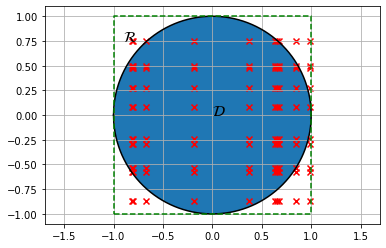

In [32]:
x = np.linspace(-1,1,1500)
plt.plot(x,CirculoA(x),'k')
plt.plot(x,CirculoB(x),'k')
plt.axis('equal')
plt.fill_between(x,CirculoA(x),CirculoB(x))
plt.plot([-1,1,1,-1,-1],[-1,-1,1,1,-1], 'g--')
plt.text(0.0,0.0, '$\mathcal{D}$', fontsize = 15)
plt.text(-0.90,0.75, '$\mathcal{R}$', fontsize = 15)

x = np.random.uniform(-1,1,10)
y = np.random.uniform(-1,1,10)
X, Y = np.meshgrid(x,y)
plt.scatter(X,Y,marker = 'x', c= 'r')
plt.grid()

La probabilidad de que el punto $(X,Y)$ esté en el círculo unitario $\mathcal{D}$ es

$$P((X,Y)\in\mathcal{D})=\frac{A(\mathcal{D})}{A(\mathcal{R})}=\frac{\pi}{4}.$$

Luego, definimos una variable aleatoria de Bernoulli $B$ de manera que

$$B=\left\lbrace\begin{array}{ccc}0 & \text{si} & (X,Y)\notin\mathcal{D}\\1 & \text{si} & (X,Y)\in\mathcal{D} \end{array}\right.=\left\lbrace\begin{array}{ccc}0 & \text{si} & X^2+Y^2>1\\1 & \text{si} & X^2+Y^2\leq 1 \end{array}\right..$$

Entonces, el valor esperado de la variable aleatoria $B$ es

$$E\left[B\right]=\theta=P((X,Y)\in\mathcal{D})=\frac{A(\mathcal{D})}{A(\mathcal{R})}.$$

De lo anterior, una estimación de $\theta$ se puede obtener como

$$\theta=\frac{A(\mathcal{D})}{A(\mathcal{R})}\approx \frac{1}{N}\sum_{i=1}^{N}b_i,$$

donde 

$$b_i=\left\lbrace\begin{array}{ccc}0 & \text{si} & x_i^2+y_i^2>1\\1 & \text{si} & x_i^2+y_i^2\leq 1 \end{array}\right.$$

son realizaciones de la variable aleatoria $B$, que a su vez es producto de las realizaciones $x_i$ e $y_i$ de las variables aleatorias $X$ e $Y$, respectivamente.

Finalmente, la aproximación montecarlo tipo 2 con $N$ términos es 

$$A(\mathcal{D})\approx \frac{A(\mathcal{R})}{N}\sum_{i=1}^{N}b_i.$$

In [33]:
def bernoulli(x,y):
    return (x**2)+(y**2)<=1

In [35]:
x = np.array([0,0.8])
y = np.array([0.5,0.8])
bernoulli(x,y)

array([ True, False])

In [58]:
x = np.random.uniform(-1,1,1000)
y = np.random.uniform(-1,1,1000)
B = bernoulli(x,y)
th = np.mean(B)
AR = 4
th *AR

3.148

De nuevo, comparemos con el valor exacto.

In [62]:
N = np.logspace(3,7,5).astype('int')
N

array([    1000,    10000,   100000,  1000000, 10000000])

Escribamos una función que tenga como entradas:
- la función que describe la region $region$,
- los límites de la region $a_1$, $b_1$, $a_2$ y $b_2$, con $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$ y
- el número de términos que se usará en la aproximación $N$,

y que devuelva la aproximación montecarlo tipo 2 del area de la region.

In [66]:
def montecarlo2(bernoulli,minx,maxx,miny,maxy,N):
    ux = np.random.uniform(minx,maxx,N)
    uy = np.random.uniform(miny,maxy,N)
    B = bernoulli(ux,uy)
    AR = (maxx-minx)*(maxy-miny)
    return AR*np.mean(B)

In [67]:
import pandas as pd

In [69]:
tabla = pd.DataFrame(index = N, columns = ['Aprox','Error'])
for n in N:
    tabla.loc[n,'Aprox'] = montecarlo2(bernoulli,-1,1,-1,1,n)
tabla['Error'] = np.abs(np.pi-tabla['Aprox'])
tabla

,Aprox,Error
1000,3.176,0.034407
10000,3.1392,0.002393
100000,3.13628,0.005313
1000000,3.142948,0.001355
10000000,3.142561,0.000969


**Actividad.** Utilizar la anterior función para aproximar el área de la región descrita por

$$4(2x-1)^4+8(2y-1)^8<1+2(2y-1)^3(3x-2)^2$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos).

In [70]:
def region(x,y):
    return (4*(2*x -1)**4) + (8*(2*y -1)**8) < 1 + (2*(2*y - 1)**3)*((3*x - 2)**2)

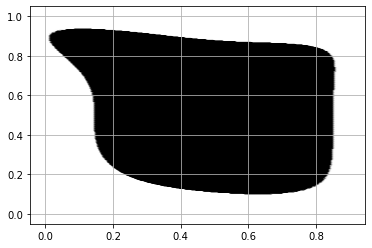

In [80]:
minx, maxx = 0,0.9
miny, maxy = 0,1#-0.5,1
x = np.linspace(minx,maxx,300)
y = np.linspace(miny,maxy,300)
X, Y = np.meshgrid(x,y)
plt.scatter(X,Y,c =~ region(X,Y), cmap = 'gray') # ~ es negación booleana
plt.grid()

In [88]:
N = np.logspace(1,5,5).astype('int')
tabla = pd.DataFrame(index = N, columns = ['Aprox', 'E rel'])
for n in N:
    tabla.loc[n, 'Aprox'] = montecarlo2(region,minx,maxx,miny,maxy,n)
AR = (maxx-minx)*(maxy-miny)
th = tabla['Aprox']/AR
tabla['E rel'] = (1/np.sqrt(N))*(((1-th)/th)**0.5)
tabla

,Aprox,E rel
10,0.81,0.105409
100,0.549,0.079959
1000,0.5562,0.024862
10000,0.55035,0.007971
100000,0.54648,0.002543


### Error relativo a priori
$$
E_{rel} = \dfrac{1}{\sqrt{N}}\sqrt{\dfrac{1-\theta}{\theta}}
$$


___
## Error de aproximación de integrales por montecarlo
Ver [documento mit](https://ocw.mit.edu/courses/mechanical-engineering/2-086-numerical-computation-for-mechanical-engineers-fall-2014/nutshells-guis/MIT2_086F14_Monte_Carlo.pdf), página 5.